In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/room-occupancy/room-occupancy.csv


# Importing libraries

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Reading the dataset

In [4]:
df=pd.read_csv("/kaggle/input/room-occupancy/room-occupancy.csv")
df.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,23.7000,26.272,585.200000,749.200000,0.004764,1
1,23.7180,26.290,578.400000,760.400000,0.004773,1
2,23.7300,26.230,572.666667,769.666667,0.004765,1
3,23.7225,26.125,493.750000,774.750000,0.004744,1
4,23.7540,26.200,488.600000,779.000000,0.004767,1


# Checking dataset Info

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2665 entries, 0 to 2664
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Temperature    2665 non-null   float64
 1   Humidity       2665 non-null   float64
 2   Light          2665 non-null   float64
 3   CO2            2665 non-null   float64
 4   HumidityRatio  2665 non-null   float64
 5   Occupancy      2665 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 125.0 KB


# Checking for null Values

In [7]:
df.isnull().sum()

Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64

# Check for duplicted data

In [10]:
df.duplicated().sum()

82

This means duplicated data is present in the dataset.

# Removing the duplicate Values

In [11]:
df.drop_duplicates(keep="first",inplace=True)

Again , check for removal of duplicates 

In [12]:
df.duplicated().sum()

0

 no duplicate value remaining 

# Checking dependecy of columns on target columns

In [19]:
df.corr()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
Temperature,1.000000,0.711831,0.764141,0.867297,0.892671,0.700295
Humidity,0.711831,1.000000,0.555120,0.911464,0.950942,0.605333
Light,0.764141,0.555120,1.000000,0.764591,0.688089,0.926588
CO2,0.867297,0.911464,0.764591,1.000000,0.964322,0.763558
HumidityRatio,0.892671,0.950942,0.688089,0.964322,1.000000,0.695460
Occupancy,0.700295,0.605333,0.926588,0.763558,0.695460,1.000000


# Plotting Graph

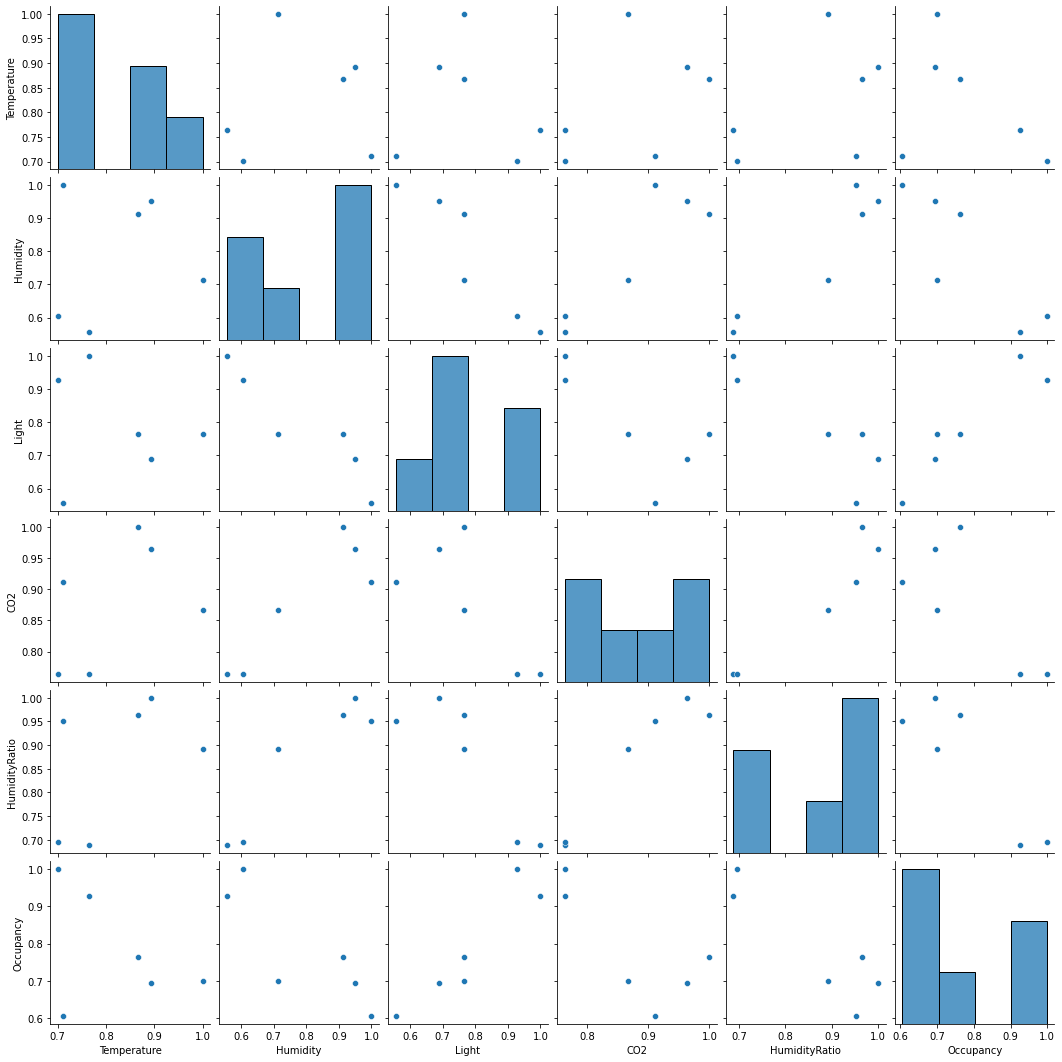

In [20]:
sns.pairplot(df.corr())

# Various Plots related to dataset

In [22]:
df.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,23.7000,26.272,585.200000,749.200000,0.004764,1
1,23.7180,26.290,578.400000,760.400000,0.004773,1
2,23.7300,26.230,572.666667,769.666667,0.004765,1
3,23.7225,26.125,493.750000,774.750000,0.004744,1
4,23.7540,26.200,488.600000,779.000000,0.004767,1


Text(9.924999999999997, 0.5, 'Temperature')

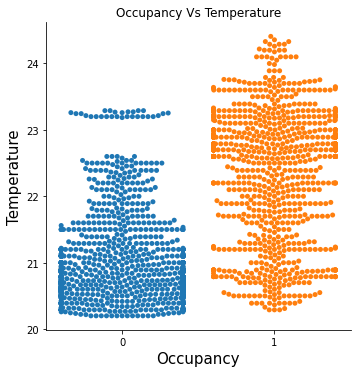

In [74]:
sns.catplot(x="Occupancy",y="Temperature",data=df,kind="swarm")
plt.title("Occupancy Vs Temperature")
plt.xlabel("Occupancy",fontsize=15)
plt.ylabel("Temperature",fontsize=15)

Text(9.924999999999997, 0.5, 'Humidity')

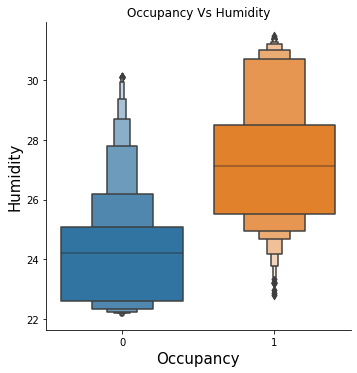

In [75]:
sns.catplot(x="Occupancy",y="Humidity",data=df,kind="boxen")
plt.title("Occupancy Vs Humidity")
plt.xlabel("Occupancy",fontsize=15)
plt.ylabel("Humidity",fontsize=15)

Text(0, 0.5, 'Light')

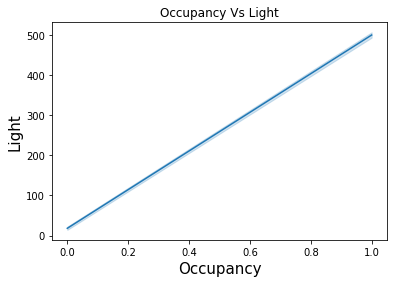

In [76]:
sns.lineplot(x="Occupancy",y="Light",data=df)
plt.title("Occupancy Vs Light")
plt.xlabel("Occupancy",fontsize=15)
plt.ylabel("Light",fontsize=15)

Text(0, 0.5, 'CO2')

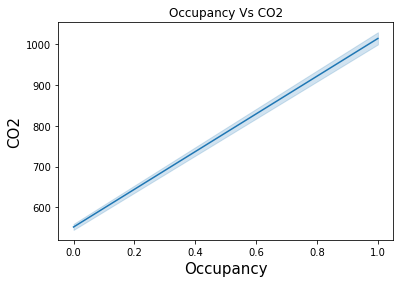

In [77]:
sns.lineplot(x="Occupancy",y='CO2',data=df)
plt.title("Occupancy Vs CO2")
plt.xlabel("Occupancy",fontsize=15)
plt.ylabel("CO2",fontsize=15)

Text(-12.075000000000003, 0.5, 'Humidity Ratio')

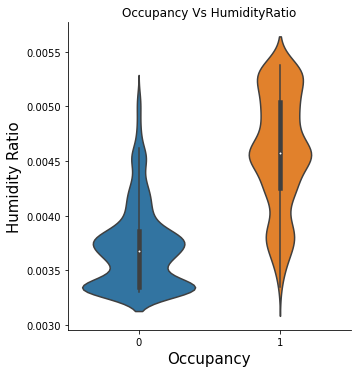

In [79]:
sns.catplot(x="Occupancy",y="HumidityRatio",data=df,kind="violin")
plt.title("Occupancy Vs HumidityRatio")
plt.xlabel("Occupancy",fontsize=15)
plt.ylabel("Humidity Ratio",fontsize=15)

In [45]:
df.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,23.7000,26.272,585.200000,749.200000,0.004764,1
1,23.7180,26.290,578.400000,760.400000,0.004773,1
2,23.7300,26.230,572.666667,769.666667,0.004765,1
3,23.7225,26.125,493.750000,774.750000,0.004744,1
4,23.7540,26.200,488.600000,779.000000,0.004767,1


# Seperating dependent and independent variable

In [60]:
x=df.drop("Occupancy",axis="columns")

In [61]:
y=df["Occupancy"]

# Spltting the dataset to overcome overfitting Problem

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

Best model is Decision tree classifier for this dataset ( according to the dataset )

In [65]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [67]:
print('Decision tree classifier accuracy is : '+str(model.score(x_test,y_test)*100))

Decision tree classifier accuracy is : 98.29721362229103


Predicting the test dataset result

In [68]:
predict=model.predict(x_test)
predict

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,

# Confusion Matrix

In [69]:
from sklearn.metrics import confusion_matrix
cv=confusion_matrix(predict,y_test)
cv

array([[393,   5],
       [  6, 242]])

Graph representation of Confusion matrix

Text(33.0, 0.5, 'Actual values')

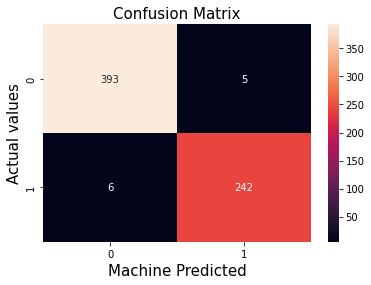

In [72]:
sns.heatmap(cv,annot=True,fmt='g')
plt.title("Confusion Matrix",fontsize=15)
plt.xlabel("Machine Predicted",fontsize=15)
plt.ylabel("Actual values",fontsize=15)


# DataFrame Representation for test dataset

In [87]:
data=pd.DataFrame(x_test)
data=data.sort_index()
data["Actual Values"]=y_test
data["Predicted Values"]=predict
data

,Temperature,Humidity,Light,CO2,HumidityRatio,Actual Values,Predicted Values
2,23.730,26.230000,572.666667,769.666667,0.004765,1,0
4,23.754,26.200000,488.600000,779.000000,0.004767,1,1
7,23.754,26.290000,509.000000,797.000000,0.004783,1,0
9,23.736,26.390000,510.000000,809.000000,0.004796,1,0
12,23.700,26.600000,475.250000,832.000000,0.004824,1,1
...,...,...,...,...,...,...,...
2644,24.100,26.566667,758.333333,1191.333333,0.004936,1,1
2645,24.100,26.472500,775.750000,1213.750000,0.004919,1,0
2651,24.175,25.840000,782.500000,1140.500000,0.004822,1,0
2652,24.200,25.891667,786.166667,1145.333333,0.004839,1,0
